<a href="https://colab.research.google.com/github/Luciahelenasantos/PUC-SPRINT-III/blob/main/MVP_SPRINTIII_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando bibliotecas

In [1]:
# Importe as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
import psycopg2

import warnings

from google.colab import drive # acesso ao drive do google Colab - 'drive.mount'
import os # para o retorno do caminho dos dados - 'os.chdir'

In [2]:
warnings.filterwarnings("ignore")

# Criando Funções

In [3]:
# Função que cria a variável Nmes com os nomes dos meses do ano

def calcula_nome_mes(mes):
  vmes = mes

  if mes == 1:
    return "Janeiro"
  elif mes == 2:
    return "Fevereiro"
  elif mes == 3:
    return "Março"
  elif mes == 4:
    return "Abril"
  elif mes == 5:
    return "Maio"
  elif mes == 6:
    return "Junho"
  elif mes == 7:
    return "Julho"
  elif mes == 8:
    return "Agosto"
  elif mes == 9:
    return "Setembro"
  elif mes == 10:
    return "Outubro"
  elif mes == 11:
    return "Novembro"
  else:
    return "Dezembro"


# Função que cria a variável num com valores numéricos para as estações do ano

def calcula_estacao_ano(dt):
  vdia = dt.day
  vmes = dt.month

  if vmes in (1,2):
    return "Verão"
  elif vmes == 3:
    if vdia < 21:
      return "Verão"
    else:
      return "Outono"
  elif vmes in (4,5):
      return "Outono"
  elif vmes == 6:
      if vdia < 21:
        return "Outono"
      else:
        return "Inverno"
  elif vmes in (7,8):
      return "Inverno"
  elif vmes == 9:
      if vdia < 21:
        return "Inverno"
      else:
        return "Primavera"
  elif vmes in (10,11):
      return "Primavera"
  elif vmes == 12:
      if vdia < 21:
        return "Primavera"
      else:
        return "Verão"


# Preparando o Ambiente

In [4]:
# Apontando para My Drive

drive.mount('/content/drive', force_remount=True)

os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


# Carregando os Dados

In [5]:
# Importando o arquivo em formato csv hospedado em My Drive

caminho = "/content/drive/My Drive/dadoarsp/SP_poluicao_dados.csv"

dadoarsp = pd.read_csv(caminho, index_col=False, delimiter=',')

In [6]:
# Alterando o atributo Data de object para formato date

dadoarsp['Data'] = pd.to_datetime(dadoarsp['Data'])

In [7]:
# Suponha que você tenha um DataFrame chamado 'dadosarsp'
dadoarsp = dadoarsp.drop(columns=['Unnamed: 0'])


In [8]:
dadoarsp['Ano'] = dadoarsp['Data'].dt.year
dadoarsp['Mes'] = dadoarsp['Data'].dt.month

In [9]:
# Criando a variável "nmes" dando nome aos meses dos anos

dadoarsp["nmes"] = dadoarsp["Mes"].apply(calcula_nome_mes)

In [10]:
# Criando a variável "estacao_ano" para identificar as estações climáticas

dadoarsp["estacao_ano"] = dadoarsp["Data"].apply(calcula_estacao_ano)

In [11]:
dadoarsp

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Ano,Mes,nmes,estacao_ano
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica,2015,1,Janeiro,Verão
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica,2015,1,Janeiro,Verão
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica,2015,1,Janeiro,Verão
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica,2015,1,Janeiro,Verão
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica,2015,1,Janeiro,Verão
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,2,Fevereiro,Verão
10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,3,Março,Verão
10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual,2021,4,Abril,Outono
10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual,2021,5,Maio,Outono


In [12]:
dadoarsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ID           int64         
 1   Data         datetime64[ns]
 2   Hora         object        
 3   Estacao      object        
 4   Codigo       object        
 5   Poluente     object        
 6   Valor        float64       
 7   Unidade      object        
 8   Tipo         object        
 9   Ano          int64         
 10  Mes          int64         
 11  nmes         object        
 12  estacao_ano  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 1.1+ GB


# PM10

In [13]:
# Selecionando no banco dadoarIR_grf os Anos de 2013 e 2020

dadoarMP10 = dadoarsp[['Data','Estacao', 'Poluente', 'Valor', 'Ano','estacao_ano']]
dadoarMP10 = dadoarMP10.loc[  dadoarMP10 ['Poluente'] == 'MP10' ]

#dadoarMP10 = dadoarMP10.loc[ ( dadoarMP10 ['Ano'] == 2021) & ( dadoarMP10 ['Poluente'] == 'MP10') ]

In [14]:
dadoarMP10

,Data,Estacao,Poluente,Valor,Ano,estacao_ano
0,2015-01-01,Americana - Vila Santa Maria,MP10,65.0,2015,Verão
1,2015-01-01,Americana - Vila Santa Maria,MP10,98.0,2015,Verão
2,2015-01-01,Americana - Vila Santa Maria,MP10,79.0,2015,Verão
3,2015-01-01,Americana - Vila Santa Maria,MP10,53.0,2015,Verão
4,2015-01-01,Americana - Vila Santa Maria,MP10,35.0,2015,Verão
...,...,...,...,...,...,...
10980190,2021-11-20,Santa Gertrudes - Jd. Luciana,MP10,24.0,2021,Primavera
10980191,2021-11-26,Santa Gertrudes - Jd. Luciana,MP10,27.0,2021,Primavera
10980192,2021-12-02,Santa Gertrudes - Jd. Luciana,MP10,49.0,2021,Primavera
10980193,2021-12-08,Santa Gertrudes - Jd. Luciana,MP10,53.0,2021,Primavera


In [15]:
descricao_valor = dadoarMP10['Valor'].describe()
print(descricao_valor)

count    2.883216e+06
mean     2.920784e+01
std      2.595918e+01
min      0.000000e+00
25%      1.300000e+01
50%      2.200000e+01
75%      3.700000e+01
max      1.924000e+03
Name: Valor, dtype: float64


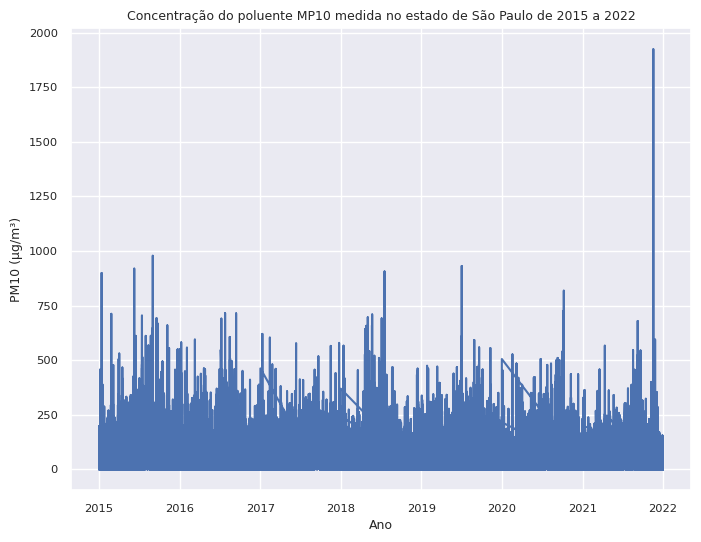

In [16]:
# Gráfico de linhas da série histórica do poluente PM10

sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=0.75)
plt.figure(figsize=(8, 6))
plt.ylabel("PM10 (µg/m³)")
plt.xlabel("Ano")
plt.plot(dadoarMP10['Data'], dadoarMP10['Valor'])
plt.title('Concentração do poluente MP10 medida no estado de São Paulo de 2015 a 2022')
plt.show()

In [17]:
dadoarMP10_2022 = dadoarMP10[dadoarMP10['Ano'] == 2022]

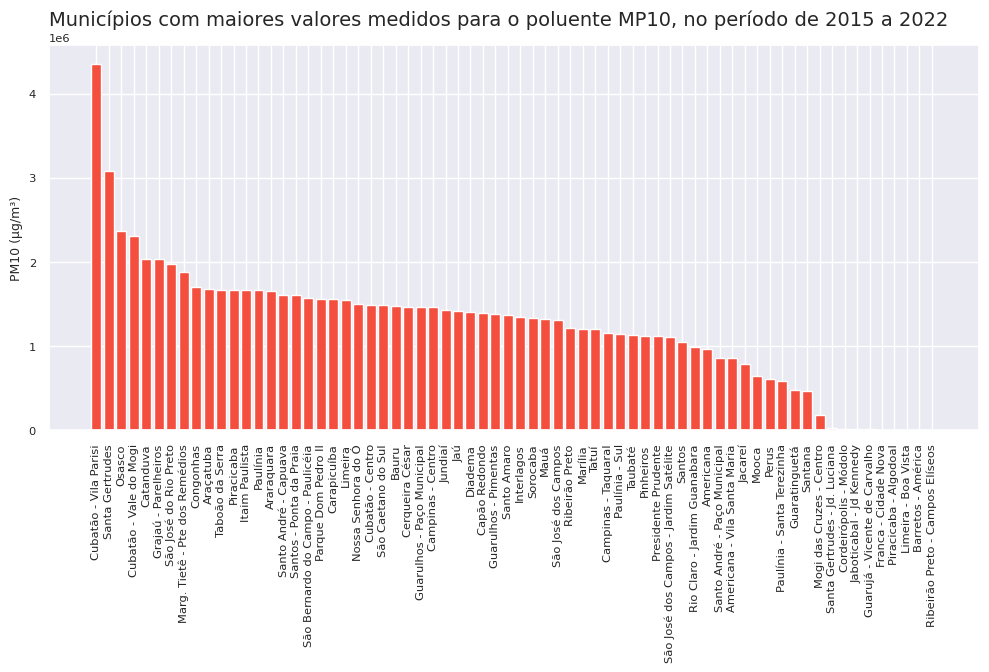

In [18]:
# analise por Municípios ao longo do período 2015 - 2022

Graf_Munic = dadoarMP10.groupby( by=['Estacao'] ).sum().reset_index()[['Estacao', 'Valor']].sort_values( 'Valor', ascending=False )
Graf_Munic.head()
plt.figure( figsize=(12, 5) )
plt.title( 'Municípios com maiores valores medidos para o poluente MP10, no período de 2015 a 2022', loc='left', fontsize=14 )
plt.bar( Graf_Munic.Estacao, Graf_Munic['Valor'], color='#f44e3f' )
plt.ylabel('PM10 (µg/m³)')
plt.xticks( rotation=90 );